# Team as an entity model

This model is a

In [1]:
# Import
from torch import nn
from torch.utils.data import DataLoader, random_split

from models.models import *
from datasets.datasets import *
from utils import *

In [2]:
# Meta
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset

In [3]:
file = './Data/team/processed/team_data.xlsx'
dataset = get_team_dataset(file, NL=[5])

# Dataloader

In [4]:
batch_size = 100

# NOTE: we avoid contamination by training/testing with different players/teams
N_datasets = dataset.random_split(0.1)
dataset_train = TeamDataset(N_datasets[0][1],N=N_datasets[0][0])
dataset_test = TeamDataset(N_datasets[0][2],N=N_datasets[0][0])


# Must generate batches of sequence data with the following format:
# (batch_size, num_seasons(N), input_size(num stats))
# (https://stackoverflow.com/questions/49466894/how-to-correctly-give-inputs-to-embedding-lstm-and-linear-layers-in-pytorch/49473068#49473068)
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

print(dataset_train.__getitem__(0))

(tensor([[2.8000e+01, 3.8000e+01, 4.3800e-01, 3.6000e+00, 4.0400e+00, 2.2620e+03,
         1.2700e+01, 2.4850e+03, 8.7000e-01],
        [3.4000e+01, 3.8000e+01, 4.7500e-01, 3.4100e+00, 3.7300e+00, 2.3100e+03,
         1.1800e+01, 2.3530e+03, 8.7300e-01],
        [4.3000e+01, 2.5000e+01, 6.1300e-01, 4.0000e+00, 3.2000e+00, 2.4780e+03,
         1.2900e+01, 2.2380e+03, 8.8600e-01],
        [4.7000e+01, 2.8000e+01, 6.1300e-01, 4.3900e+00, 3.3300e+00, 2.7650e+03,
         1.3300e+01, 2.4250e+03, 8.8500e-01],
        [4.6000e+01, 3.0000e+01, 5.9500e-01, 4.2400e+00, 3.2700e+00, 2.9900e+03,
         1.1900e+01, 2.3030e+03, 8.8100e-01]]), tensor([33.0000, 11.0000,  0.7290]))


In [15]:
print(len(N_datasets))
print(N_datasets[0][1][20])
print(len(N_datasets[0][2]))

1


IndexError: tuple index out of range

# Models

In [6]:
input_size = len(dataset_train.__getitem__(0)[0][0])
output_size = len(dataset_train.__getitem__(0)[1])
hidden_size = 50
#model = TeamAsEntity(input_size=input_size, hidden_size=hidden_size, device=device).to(device)

"""
Hidden Layers Size Exploration
"""
#hidden_sizes = [50, 100, 200]
hidden_sizes = [50]


"""
Stacked LSTM Exploration
"""
#num_layerss = [1,2,3]
num_layerss = [1]

# Training and Validation

In [7]:
criterion = RMSELoss()
opt = torch.optim.Adam
epochs = 1500
loss_interval = 25

In [8]:
results = []

for hidden_size in hidden_sizes:
    for num_layers in num_layerss:

        print("\n####################")
        print(f"Model: {hidden_size}_{num_layers}")
        print("####################\n")

        model = TeamAsEntity(input_size=input_size, output_size=output_size, hidden_size=hidden_size, num_layers=num_layers, device=device).to(device)
        optimizer = opt(model.parameters(),lr=0.0001)
        
        res = train_and_validate(model, criterion, optimizer, dataloader_train, dataloader_test, epochs=epochs, loss_interval=loss_interval, device=device)
        results.append([(hidden_size,num_layers), res])


####################
Model: 50_1
####################



0 th epoch :  28.277316093444824
Validation loss for epoch 0: 28.24188232421875
Validation loss for epoch 25: 26.649627685546875
50 th epoch :  25.925894737243652
Validation loss for epoch 50: 25.88344955444336
Validation loss for epoch 75: 25.346628189086914
100 th epoch :  24.847577730814617
Validation loss for epoch 100: 24.857587814331055
Validation loss for epoch 125: 24.389142990112305
150 th epoch :  23.980921427408855
Validation loss for epoch 150: 23.93255043029785
Validation loss for epoch 175: 23.483848571777344
200 th epoch :  23.089319864908855
Validation loss for epoch 200: 23.040924072265625
Validation loss for epoch 225: 22.602619171142578
250 th epoch :  22.171862920125324
Validation loss for epoch 250: 22.168073654174805
Validation loss for epoch 275: 21.736839294433594
300 th epoch :  21.373103777567547
Validation loss for epoch 300: 21.30855941772461
Validation loss for epoch 325: 20.882957458496094
350 th epoch :  20.515212376912434
Validation loss for epoch 350: 2

# Plot Results

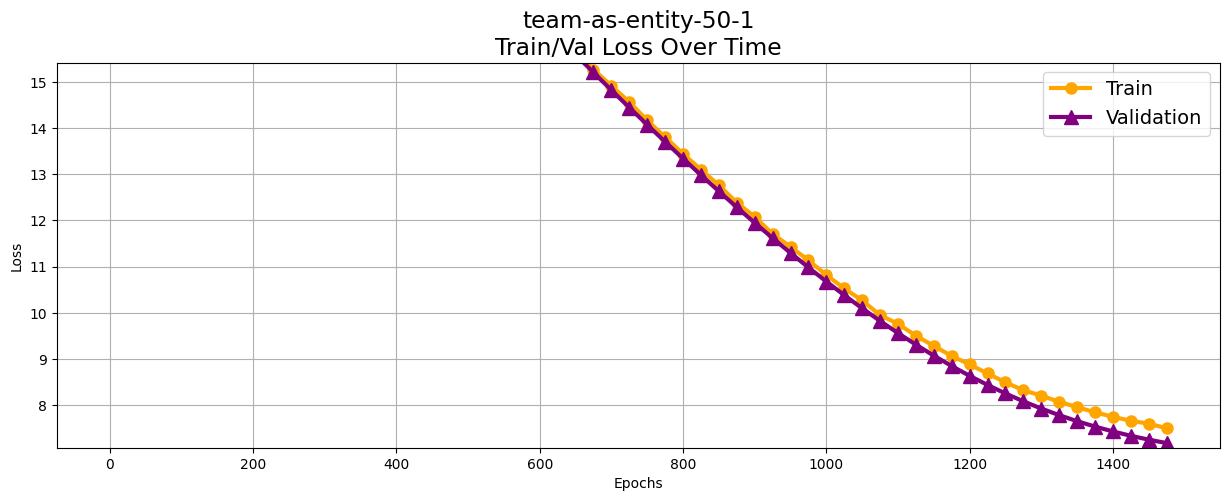

In [9]:
for res in  results:
    plot_train_v_loss(f"team-as-entity-{res[0][0]}-{res[0][1]}", res[1][1], res[1][2], loss_interval)

# Exploration results

Exploration for the team-as-entity model by varying the number of stacked LSTM layers and the number of hidden features. Apparently adding stacked LSTM layers for the same number of hidden features makes the loss decrease slower, but they all reach about the same loss plateau of 0.25. Adding more hidden layers makes the loss decrease faster, but once again it still plateau around 0.25. 

tensor([33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926,
        33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926,
        33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926,
        33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926,
        33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926,
        33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926,
        33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926,
        33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926,
        33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926,
        33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926,
        33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926,
        33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926, 33.5926,
        33.5926, 33.5926, 33.5926, 33.59

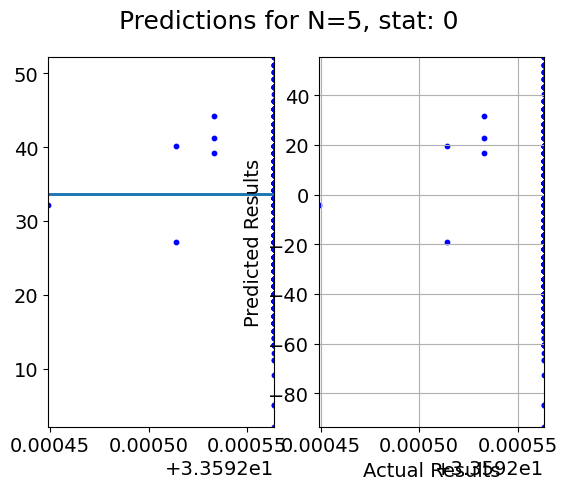

tensor([29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223,
        29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223,
        29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223,
        29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223,
        29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223,
        29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223,
        29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223,
        29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223,
        29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223,
        29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223,
        29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223,
        29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223, 29.2223,
        29.2223, 29.2223, 29.2223, 29.22

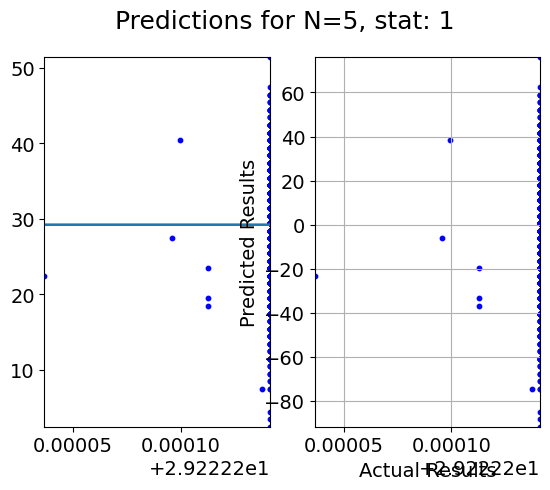

tensor([0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457,
        0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457,
        0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457,
        0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457,
        0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457,
        0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457,
        0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457,
        0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457,
        0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457,
        0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457,
        0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457,
        0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457, 0.5457,
        0.5457, 0.5457, 0.5457, 0.5457, 

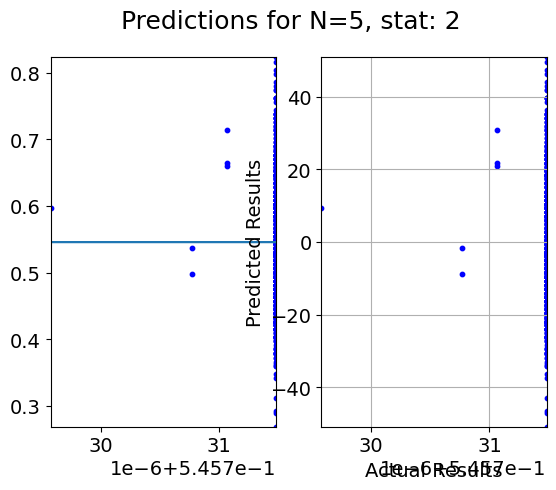

In [10]:
preds_n_targets = get_targets_preds_pairs(dataset, model, device)
plot_divergence(dataset.NL, preds_n_targets, criterion)